# 02 - Autoregressive Integrated Moving Average Models

by [Alejandro Correa Bahnsen](albahnsen.com/)

version 1.0, June 2020

## Part of the class [Advanced Methods in Data Analysis](https://github.com/albahnsen/AdvancedMethodsDataAnalysisClass)


This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). Special thanks goes to [TAVISH SRIVASTAVA]() and [Jason Brwnlee]()

# ARMA Time Series Modeling

ARMA models are commonly used in time series modeling. In ARMA model, AR stands for auto-regression and MA stands for moving average. 

## Auto-Regressive Time Series Model

Let’s understanding AR models using the case below:

The current GDP of a country say x(t) is dependent on the last year’s GDP i.e. x(t – 1). The hypothesis being that the total cost of production of products & services in a country in a fiscal year (known as GDP) is dependent on the set up of manufacturing plants / services in the previous year and the newly set up industries / plants / services in the current year. But the primary component of the GDP is the former one.

Hence, we can formally write the equation of GDP as:

`x(t) = alpha *  x(t – 1) + error (t)`

This equation is known as AR(1) formulation. The numeral one (1) denotes that the next instance is solely dependent on the previous instance.  The alpha is a coefficient which we seek so as to minimize the error function. Notice that x(t- 1) is indeed linked to x(t-2) in the same fashion. Hence, any shock to x(t) will gradually fade off in future.

For instance, let’s say x(t) is the number of juice bottles sold in a city on a particular day. During winters, very few vendors purchased juice bottles. Suddenly, on a particular day, the temperature rose and the demand of juice bottles soared to 1000. However, after a few days, the climate became cold again. But, knowing that the people got used to drinking juice during the hot days, there were 50% of the people still drinking juice during the cold days. In following days, the proportion went down to 25% (50% of 50%) and then gradually to a small number after significant number of days. The following graph explains the inertia property of AR series:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

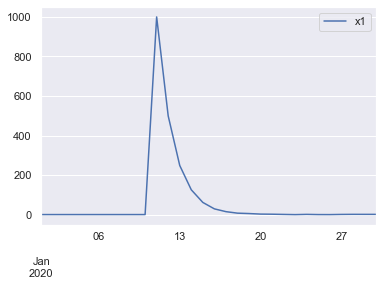

In [10]:
e = np.random.randn(30)
s = np.zeros(30)

s[10] = 1000

for i in range(11, 30):
    s[i] = 0.5 * s[i-1] + e[i]

ts = pd.DataFrame(s, 
                  index=pd.date_range("2020-01-01", periods=30),
                  columns=['x1'])
ts.plot()

## Moving Average Time Series Model
Let’s take another case to understand Moving average time series model.

A manufacturer produces a certain type of bag, which was readily available in the market. Being a competitive market, the sale of the bag stood at zero for many days. So, one day he did some experiment with the design and produced a different type of bag. This type of bag was not available anywhere in the market. Thus, he was able to sell the entire stock of 1000 bags (lets call this as x(t) ). The demand got so high that the bag ran out of stock. As a result, some 100 odd customers couldn’t purchase this bag. Lets call this gap as the error at that time point. With time, the bag had lost its woo factor. But still few customers were left who went empty handed the previous day. Following is a simple formulation to depict the scenario :

`x(t) = beta *  error(t-1) + error (t)`

If we try plotting this graph, it will look something like this:

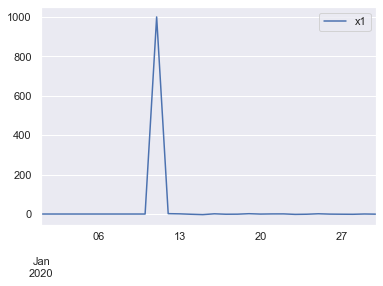

In [11]:
e = np.random.randn(30)
s = np.zeros(30)

s[10] = 1000

for i in range(11, 30):
    s[i] = 0.5 * e[i-1] + e[i]

ts = pd.DataFrame(s, 
                  index=pd.date_range("2020-01-01", periods=30),
                  columns=['x1'])
ts.plot()

Did you notice the difference between MA and AR model? In MA model, noise / shock quickly vanishes with time. The AR model has a much lasting effect of the shock.

## Difference between AR and MA models
The primary difference between an AR and MA model is based on the correlation between time series objects at different time points. The correlation between x(t) and x(t-n) for n > order of MA is always zero. This directly flows from the fact that covariance between x(t) and x(t-n) is zero for MA models (something which we refer from the example taken in the previous section). However, the correlation of x(t) and x(t-n) gradually declines with n becoming larger in the AR model. This difference gets exploited irrespective of having the AR model or MA model. The correlation plot can give us the order of MA model.

## Autocorrelation Plot
Once we have got the stationary time series, we must answer two primary questions:

- Q1. Is it an AR or MA process?

- Q2. What order of AR or MA process do we need to use?

The trick to solve these questions is available in the previous section. Didn’t you notice?

The first question can be answered using Total Correlation Chart (also known as Auto – correlation Function / ACF). ACF is a plot of total correlation between different lag functions. For instance, in GDP problem, the GDP at time point t is x(t). We are interested in the correlation of x(t) with x(t-1) , x(t-2) and so on. 



In [12]:
from statsmodels.graphics.tsaplots import plot_acf

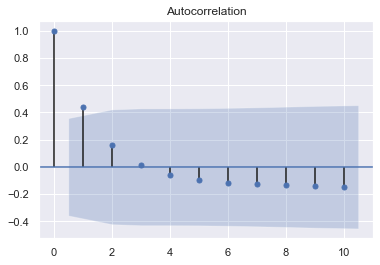

In [15]:
e = np.random.randn(30)
s = np.zeros(30)

s[10] = 1000

for i in range(11, 30):
    s[i] = 0.5 * s[i-1] + e[i]

ts = pd.DataFrame(s, 
                  index=pd.date_range("2020-01-01", periods=30),
                  columns=['x1'])

plot_acf(ts, lags=10);

Confidence intervals are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.

In a moving average series of lag n, we will not get any correlation between x(t) and x(t – n -1) . Hence, the total correlation chart cuts off at nth lag. So it becomes simple to find the lag for a MA series. For an AR series this correlation will gradually go down without any cut off value. So what do we do if it is an AR series?



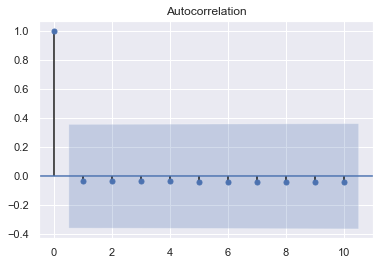

In [17]:
e = np.random.randn(30)
s = np.zeros(30)

s[10] = 1000

for i in range(11, 30):
    s[i] = 0.5 * e[i-1] + e[i]

ts = pd.DataFrame(s, 
                  index=pd.date_range("2020-01-01", periods=30),
                  columns=['x1'])

plot_acf(ts, lags=10);

## Partial Autocorrelation Function
A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps.

It is these indirect correlations that the partial autocorrelation function seeks to remove. Without going into the math, this is the intuition for the partial autocorrelation.

The example below will load the Minimum Daily Temperatures and graph the time series.



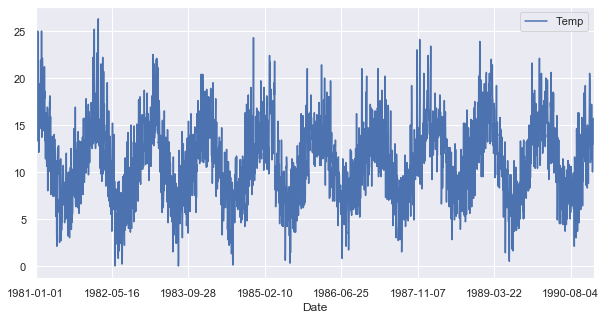

In [22]:
temp = pd.read_csv('../datasets/daily-min-temperatures.csv', header=0, index_col=0)
temp.plot(figsize=(10, 5));

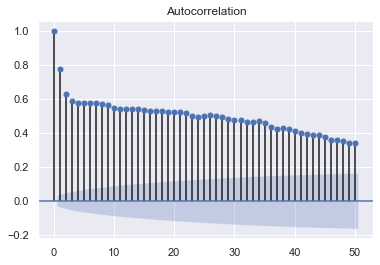

In [26]:
plot_acf(temp, lags=50);

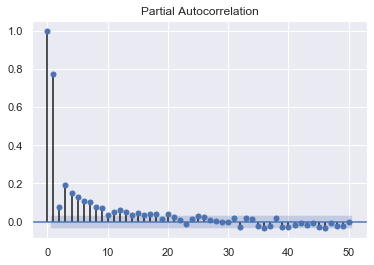

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(temp, lags=50);

## Intuition for ACF and PACF Plots
Plots of the autocorrelation function and the partial autocorrelation function for a time series tell a very different story.

We can use the intuition for ACF and PACF above to explore some thought experiments.

### Autoregression Intuition
Consider a time series that was generated by an autoregression (AR) process with a lag of k.

We know that the ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information.

This means we would expect the ACF for the AR(k) time series to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect was weakened.

We know that the PACF only describes the direct relationship between an observation and its lag. This would suggest that there would be no correlation for lag values beyond k.

This is exactly the expectation of the ACF and PACF plots for an AR(k) process.

### Moving Average Intuition
Consider a time series that was generated by a moving average (MA) process with a lag of k.

Remember that the moving average process is an autoregression model of the time series of residual errors from prior predictions. Another way to think about the moving average model is that it corrects future forecasts based on errors made on recent forecasts.

We would expect the ACF for the MA(k) process to show a strong correlation with recent values up to the lag of k, then a sharp decline to low or no correlation. By definition, this is how the process was generated.

For the PACF, we would expect the plot to show a strong relationship to the lag and a trailing off of correlation from the lag onwards.

Again, this is exactly the expectation of the ACF and PACF plots for an MA(k) process.